In [34]:
from sklearn.feature_extraction.text import TfidfVectorizer
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import defaultdict

In [35]:
data = pd.read_csv('data.csv')

In [36]:
product_descriptions = data['product_description']

In [37]:
product_descriptions_filled = product_descriptions.fillna('nodesc')

In [38]:
tfidf_vectorizer = TfidfVectorizer(max_features=20, stop_words='english')

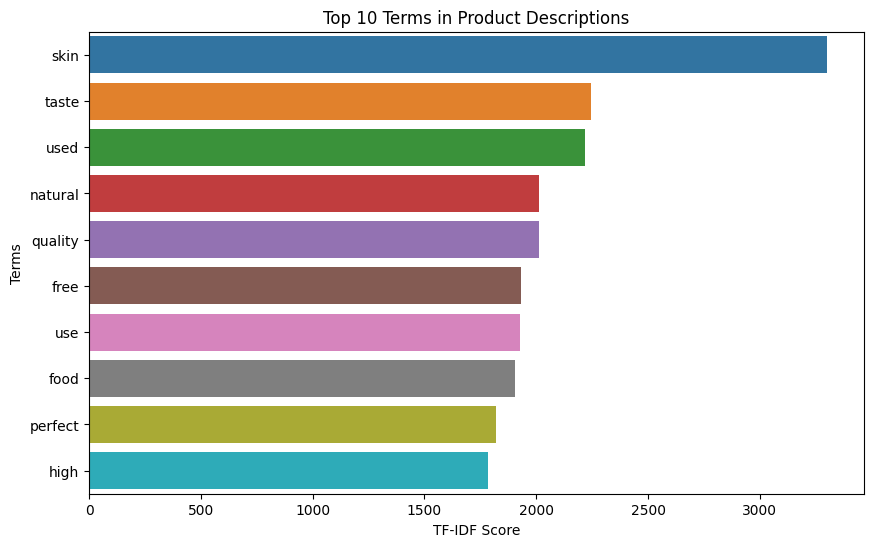

In [39]:
tfidf_matrix = tfidf_vectorizer.fit_transform(product_descriptions_filled)

# Summarize the TF-IDF values to find the most important words
sums = tfidf_matrix.sum(axis=0)
terms = tfidf_vectorizer.get_feature_names_out()
data_items = [(terms[i], sums[0, i]) for i in range(sums.shape[1])]
tfidf_summary = pd.DataFrame(data_items, columns=['term', 'tfidf']).sort_values(by='tfidf', ascending=False)

# Plot the top terms
plt.figure(figsize=(10, 6))
sns.barplot(x='tfidf', y='term', data=tfidf_summary.head(10))
plt.title('Top 10 Terms in Product Descriptions')
plt.xlabel('TF-IDF Score')
plt.ylabel('Terms')
plt.show()


In [40]:
file_path = 'data.csv'
data = pd.read_csv(file_path)

data['product_description'] = data['product_description'].fillna('no description')


def extract_top_keywords(descriptions, top_n=10):

    descriptions = [str(desc) for desc in descriptions]
    vectorizer = CountVectorizer(max_features=top_n, stop_words='english')
    matrix = vectorizer.fit_transform(descriptions)
    sums = matrix.sum(axis=0)
    terms = vectorizer.get_feature_names_out()
    keywords = [(terms[i], sums[0, i]) for i in range(sums.shape[1])]
    return sorted(keywords, key=lambda x: x[1], reverse=True)


segmented_data = defaultdict(list)
for index, row in data.iterrows():
    segmented_data[row['customer_demographics']].append(row['product_description'])

keywords_by_demographic = {
    demographic: extract_top_keywords(descriptions)
    for demographic, descriptions in segmented_data.items()
}

keywords_by_demographic


{'Female': [('skin', 5219),
  ('hair', 2706),
  ('natural', 2537),
  ('oil', 2347),
  ('free', 2084),
  ('use', 1895),
  ('healthy', 1844),
  ('helps', 1809),
  ('used', 1796),
  ('quality', 1759)],
 'Other': [('skin', 5061),
  ('hair', 2630),
  ('oil', 2423),
  ('natural', 2374),
  ('free', 2021),
  ('food', 1870),
  ('quality', 1847),
  ('use', 1811),
  ('used', 1800),
  ('helps', 1769)],
 'Male': [('skin', 5790),
  ('hair', 2566),
  ('natural', 2372),
  ('oil', 2337),
  ('free', 2009),
  ('use', 1950),
  ('helps', 1881),
  ('food', 1850),
  ('quality', 1837),
  ('used', 1772)]}

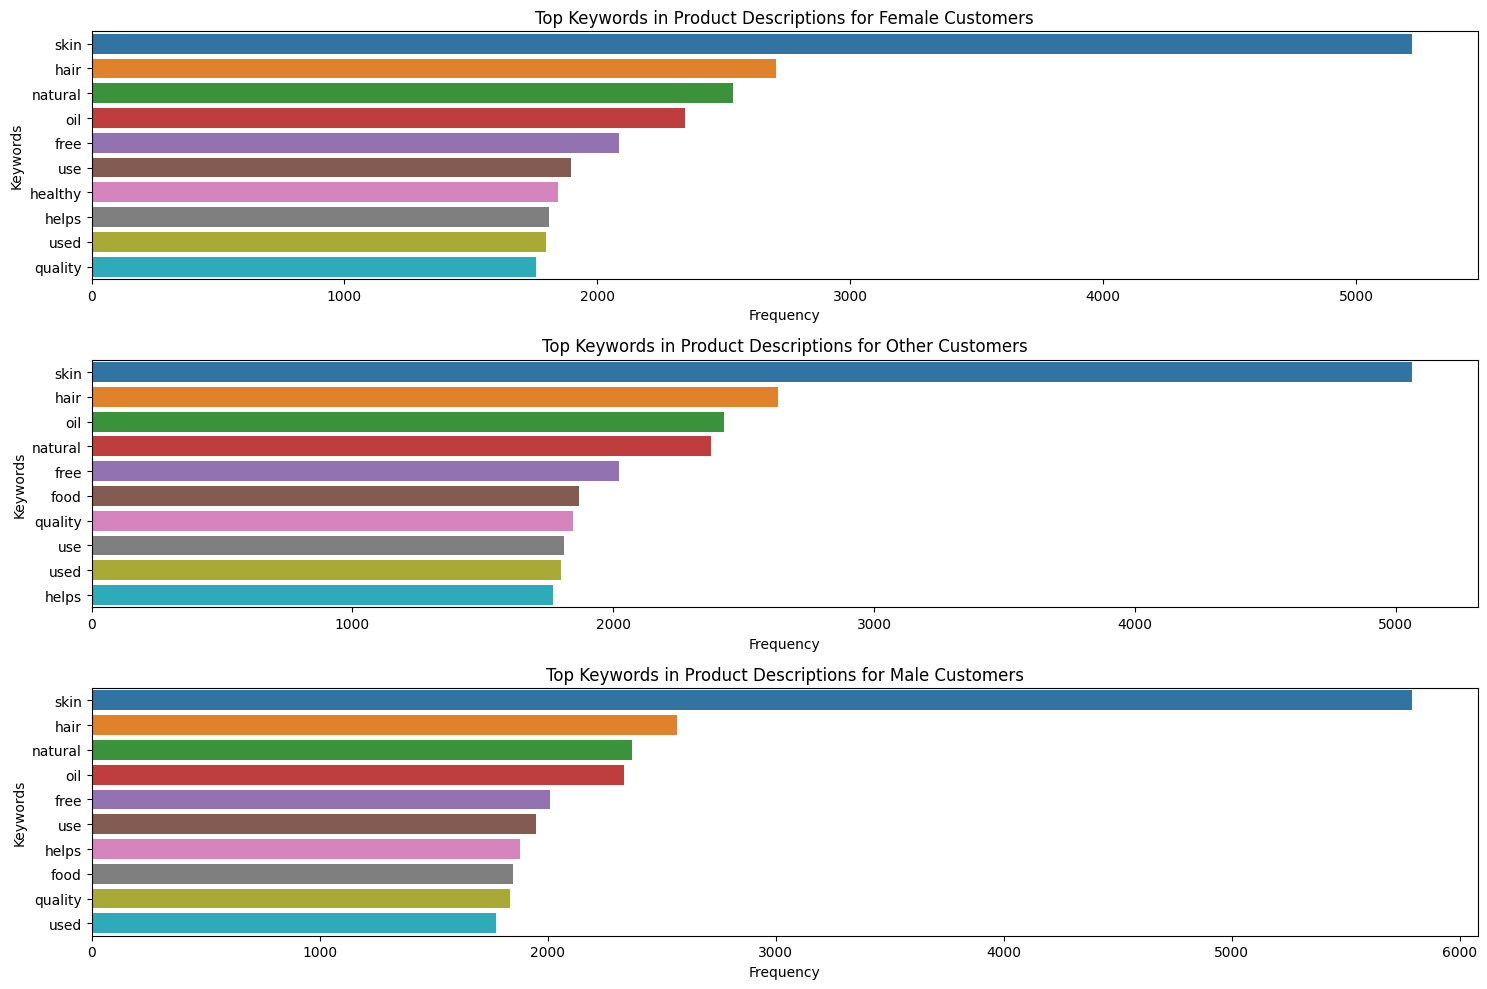

In [41]:
# Plotting the top keywords for each customer demographic
plt.figure(figsize=(15, 10))
for i, (demographic, keywords) in enumerate(keywords_by_demographic.items(), 1):
    plt.subplot(3, 1, i)
    keywords_df = pd.DataFrame(keywords, columns=['Keyword', 'Frequency'])
    sns.barplot(x='Frequency', y='Keyword', data=keywords_df)
    plt.title(f'Top Keywords in Product Descriptions for {demographic} Customers')
    plt.xlabel('Frequency')
    plt.ylabel('Keywords')

plt.tight_layout()
plt.show()



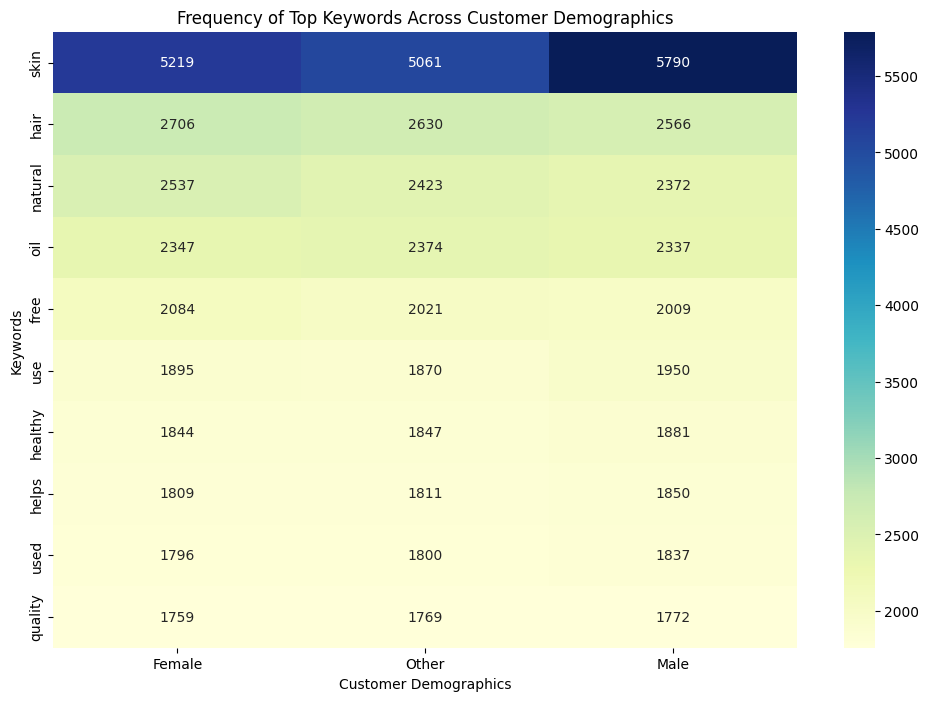

In [42]:
import numpy as np

keywords_matrix = pd.DataFrame(index=np.arange(10), columns=keywords_by_demographic.keys())

for demographic, keywords in keywords_by_demographic.items():
    for idx, (keyword, frequency) in enumerate(keywords):
        keywords_matrix.loc[idx, demographic] = frequency

top_keywords = [keyword for keyword, _ in keywords_by_demographic['Female']]  # Assuming common keywords
keywords_matrix.index = top_keywords

# Plotting the heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(keywords_matrix.astype(float), annot=True, fmt=".0f", cmap='YlGnBu')
plt.title('Frequency of Top Keywords Across Customer Demographics')
plt.xlabel('Customer Demographics')
plt.ylabel('Keywords')
plt.show()



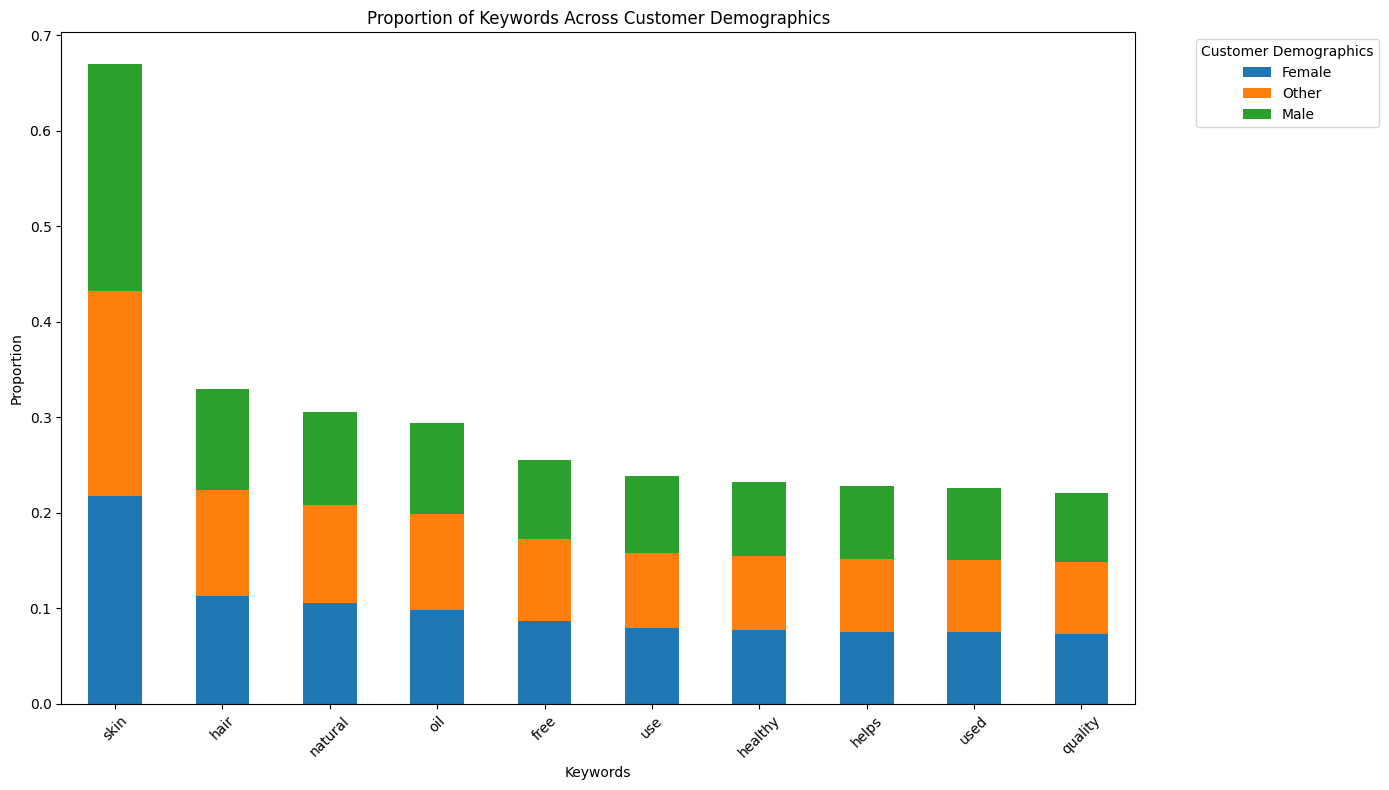

In [44]:
# Calculate the proportion of each keyword within each demographic group
keywords_proportion = keywords_matrix.div(keywords_matrix.sum(axis=0), axis=1)

# Plotting the stacked bar chart
keywords_proportion.plot(kind='bar', stacked=True, figsize=(14, 8))
plt.title('Proportion of Keywords Across Customer Demographics')
plt.xlabel('Keywords')
plt.ylabel('Proportion')
plt.legend(title='Customer Demographics', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

